In [1]:
import json
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
sns.set()

In [2]:
data = {}
months = ('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec')
years = ('19', '20')
times = []

actions = ['warn', 'mute', 'kick', 'softban', 'ban']
for year in ('18', '19','20'):
    for month in months:
        data[month+year] = [0] * len(actions)
        times.append(month+year)

for line in open('cases_other_bot.json', 'r'):
    js = json.loads(line)
    time = datetime.fromtimestamp(int(js['timestamp']['$numberLong'])//1000).timetuple()
    action = js['action']
    if action[:2] != 'un':
        data[months[time.tm_mon-1] + str(time.tm_year-2000)][actions.index(action)] += 1

unwanted = {'mute [auto]', 'remove persist', 'unban', 'unmute', 'deafen'}
for js in json.load(open('cases_dyno.json', 'r', encoding = 'utf-8'))['logs']: # for dyno
    time = js['createdAt'].split(', ')
    action = js['type'].lower()
    if action not in unwanted:
        data[time[1][:3].lower() + str(int(time[2][:4]) - 2000)][actions.index(action)] += 1

df = pd.DataFrame(data)
df.index = actions
df = df[df.columns[times.index('may18') : times.index('jul20')]]

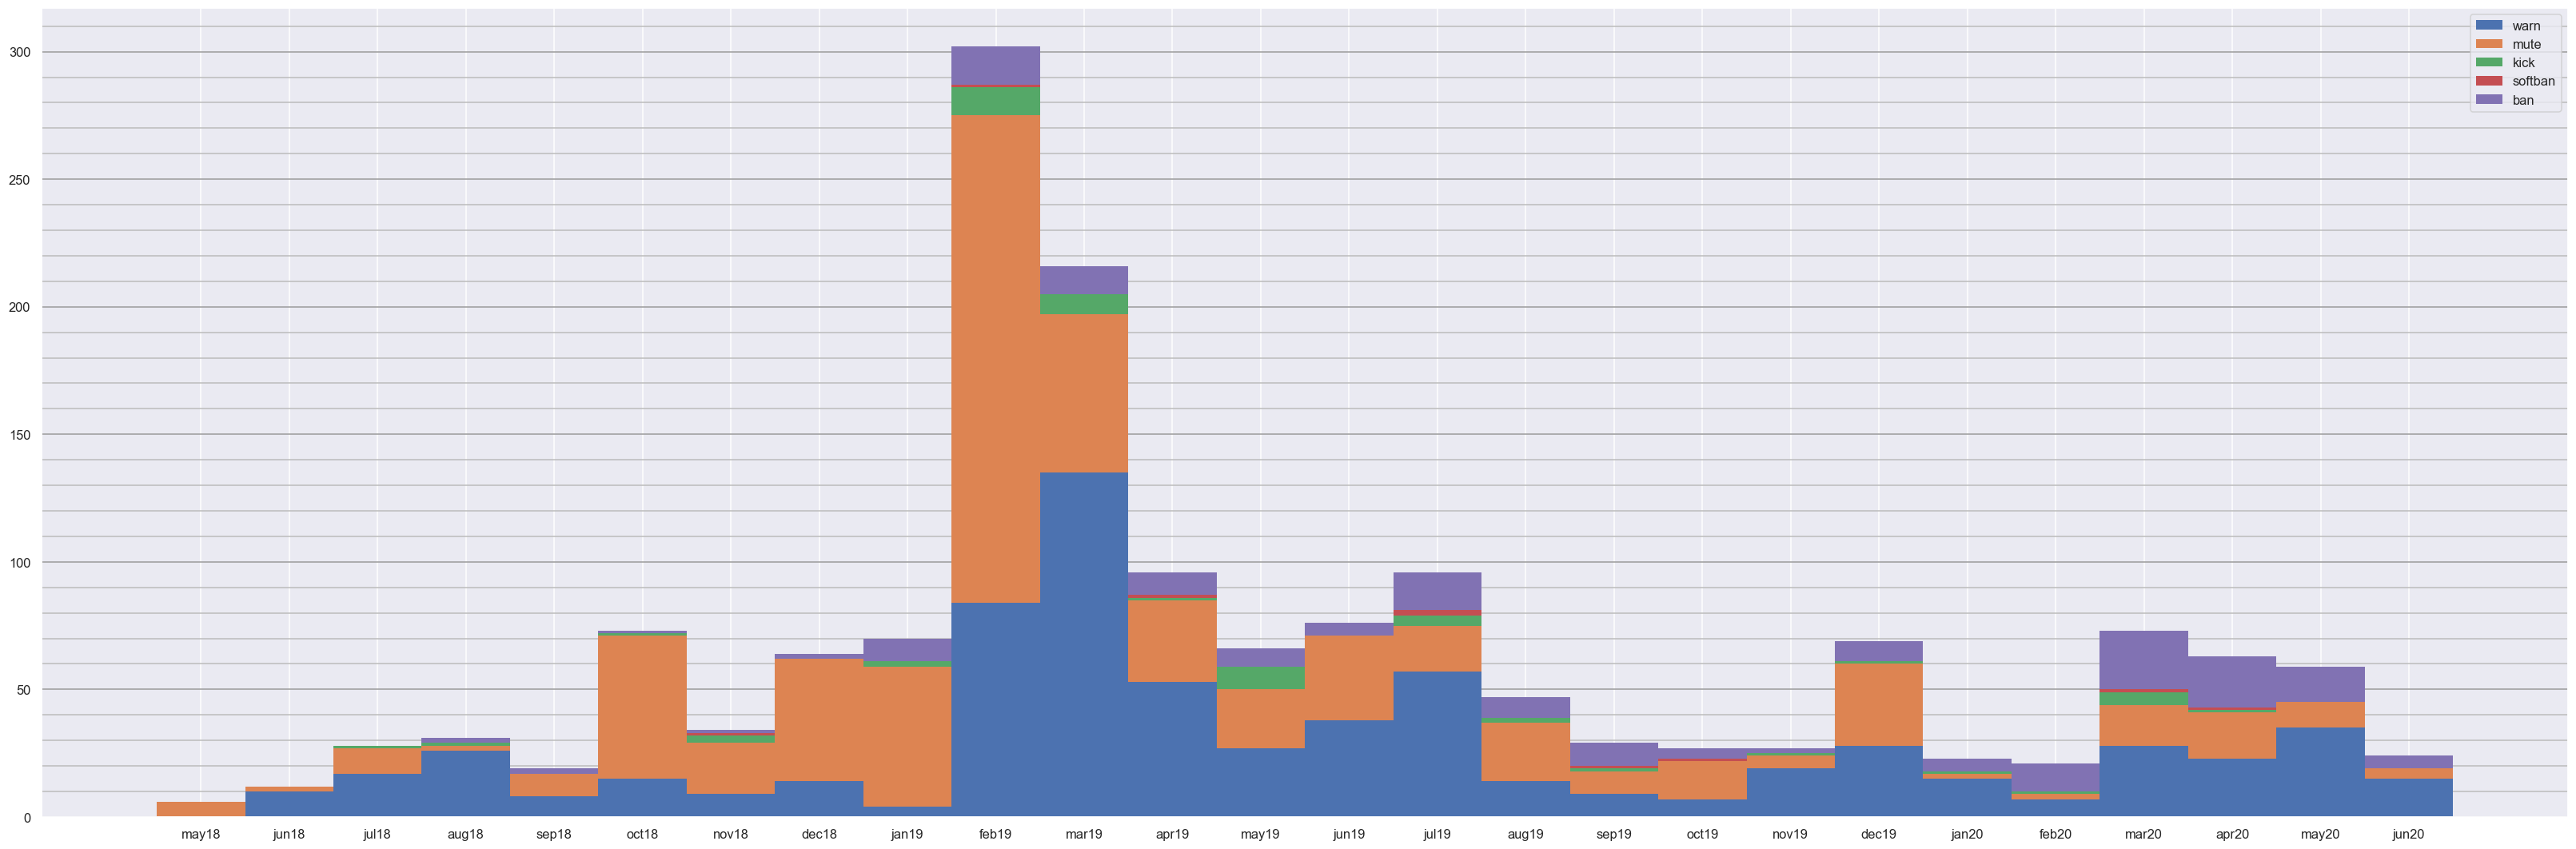

In [3]:
fig, ax = plt.subplots(figsize = (30, 10), dpi = 1080//10)
bottom = [0] * len(df.columns)
for action in actions:
    ax.bar(df.columns, df.loc[action], bottom = bottom, label = action, width = 1, edgecolor='none')
    bottom += df.loc[action]
plt.legend(actions)
plt.tight_layout()
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 350, 50))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.grid(True, axis = 'y', color = '#999999')
ax.grid(True, axis = 'y', which = 'minor', color = '#bbbbbb')
plt.savefig('moderating.png')
pass